In [8]:
# Step 1: Upload CSV
from google.colab import files
uploaded = files.upload()

Saving US_Accidents_Cleaned_Sample.csv to US_Accidents_Cleaned_Sample (1).csv


In [9]:
# Step 2: Read CSV
import pandas as pd
import io

filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()

✅ Dataset Loaded Successfully!
Shape: (3, 12)


,Start_Time,End_Time,Severity,State,City,Weather_Condition,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Latitude,Longitude
0,2021-01-01 08:00:00,2021-01-01 09:00:00,2,CA,Los Angeles,Clear,65.0,10.0,5.0,0.0,34.0522,-118.2437
1,2021-01-02 17:30:00,2021-01-02 18:00:00,3,TX,Houston,Rain,72.0,5.0,7.0,0.2,29.7604,-95.3698
2,2021-01-03 22:45:00,2021-01-03 23:15:00,2,FL,Miami,Cloudy,78.0,7.0,3.0,0.0,25.7617,-80.1918


In [10]:
# Step 3: Feature Engineering
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

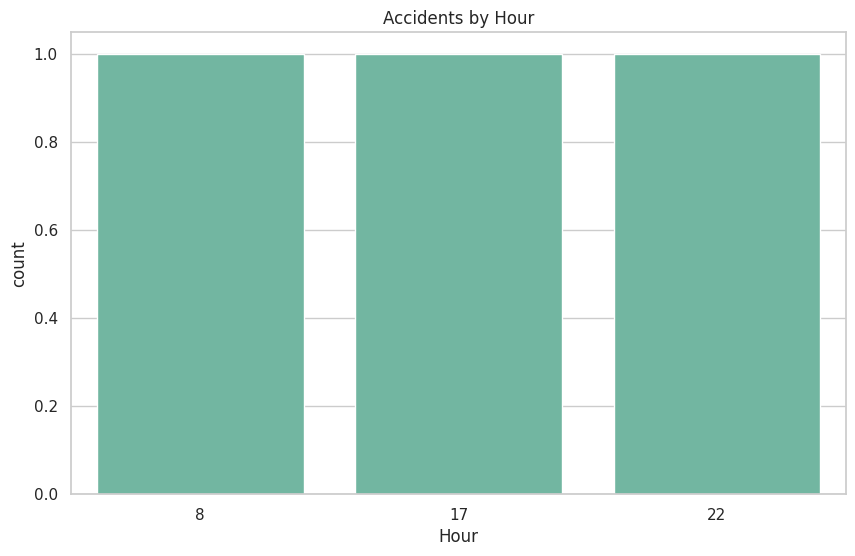

In [11]:
# Step 4: Visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="Set2", rc={"figure.figsize":(10,6)})

# Hourly Accidents
sns.countplot(data=df, x='Hour')
plt.title("Accidents by Hour")
plt.show()

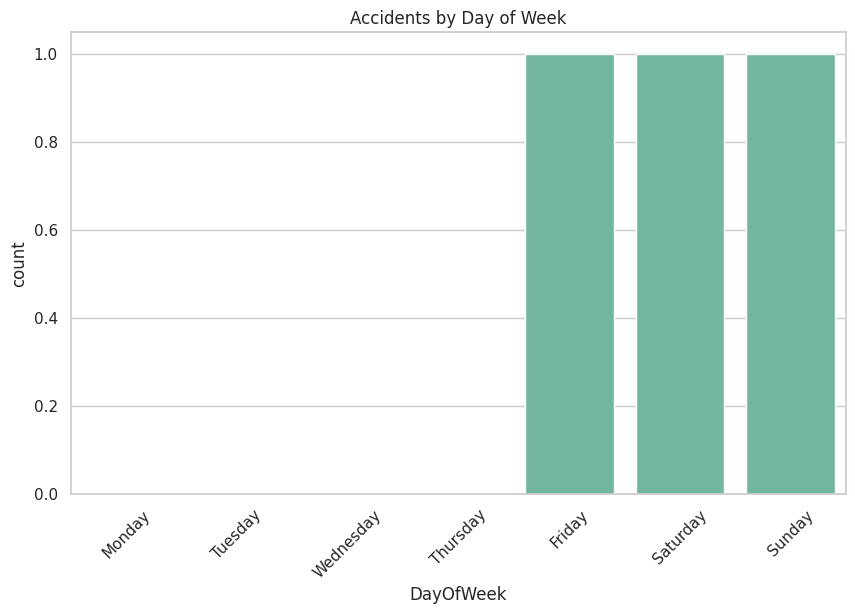

In [12]:
# Day of Week Accidents
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.countplot(data=df, x='DayOfWeek', order=order)
plt.title("Accidents by Day of Week")
plt.xticks(rotation=45)
plt.show()

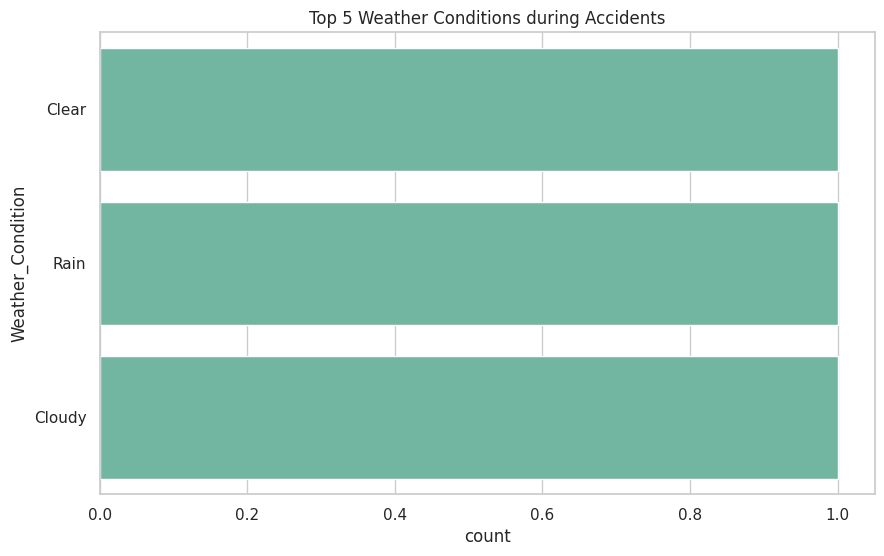

In [13]:
# Weather Condition
top_weather = df['Weather_Condition'].value_counts().nlargest(5).index
sns.countplot(data=df[df['Weather_Condition'].isin(top_weather)], y='Weather_Condition')
plt.title("Top 5 Weather Conditions during Accidents")
plt.show()